# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url_starter = 'api.openweathermap.org/data/2.5/weather?q='
#Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
cloud = []
humidity = []
temp = []
wind = []
country = []
date = []
city = []
lat = []
lng = []
reset_count = 1
city_count = 0
sleep_count = 0
print("Beginning Data Retreival")
print("-----------------------------")
while city_count < len(cities) :
    for x in range(1,51):
        try:
            print(f'Processing Record {x} of Set {reset_count} | {cities[city_count]}')
            holder = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={cities[city_count]}&APPID={api_key}').json()
            wind.append(holder['wind']['speed'])
            cloud.append(holder['clouds']['all'])
            temp.append(holder['main']['temp_max'])
            humidity.append(holder['main']['humidity'])
            country.append(holder['sys']['country'])
            date.append(holder['dt'])
            city.append(holder['name'])
            lat.append(holder['coord']['lat'])
            lng.append(holder['coord']['lon'])
            city_count += 1
        except:
           print('City not found. Skipping...')
           city_count += 1
    time.sleep(61)
    sleep_count += 1
    reset_count += 1
        

Beginning Data Retreival
-----------------------------
Processing Record 1 of Set 1 | fort-shevchenko
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | okhotsk
Processing Record 4 of Set 1 | ouesso
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | chagda
City not found. Skipping...
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | edson
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | srandakan
Processing Record 16 of Set 1 | tongliao
Processing Record 17 of Set 1 | semaria
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kiama
Processing Record 20 of Set 1 | fort nelson
Processing Record 21 of Set 1 | kununurra
Processing Record 22 of Set 1 | sentyabrskiy
City not found. Skippin

Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | kieta
Processing Record 43 of Set 4 | faya
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | swinford
Processing Record 46 of Set 4 | lumphat
Processing Record 47 of Set 4 | powell river
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | kwinana
Processing Record 50 of Set 4 | gravdal
Processing Record 1 of Set 5 | atbasar
Processing Record 2 of Set 5 | soyo
Processing Record 3 of Set 5 | sansai
City not found. Skipping...
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 5 | srednekolymsk
Processing Record 8 of Set 5 | nishihara
Processing Record 9 of Set 5 | ossora
Processing Record 10 of Set 5 | kalmunai
Processing Record 11 of Set 5 | homer
Processing Record 12 

Processing Record 28 of Set 8 | aswan
Processing Record 29 of Set 8 | kysyl-syr
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | korla
City not found. Skipping...
Processing Record 32 of Set 8 | carbondale
Processing Record 33 of Set 8 | rantepao
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | jalu
Processing Record 36 of Set 8 | seidu
Processing Record 37 of Set 8 | prince albert
Processing Record 38 of Set 8 | nguiu
City not found. Skipping...
Processing Record 39 of Set 8 | kulhudhuffushi
Processing Record 40 of Set 8 | bam
Processing Record 41 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 8 | tangshan
Processing Record 43 of Set 8 | malakal
City not found. Skipping...
Processing Record 44 of Set 8 | tarakan
Processing Record 45 of Set 8 | bolshoye sorokino
City not found. Skipping...
Processing Record 46 of Set 8 | changtu
Processing Record 47 of Set 8 | kijang
Pro

Processing Record 6 of Set 12 | ca mau
Processing Record 7 of Set 12 | holme
Processing Record 8 of Set 12 | sobolevo
Processing Record 9 of Set 12 | sarangani
Processing Record 10 of Set 12 | bucerias
Processing Record 11 of Set 12 | chernyshevskiy
Processing Record 12 of Set 12 | bayt idis
Processing Record 13 of Set 12 | rumia
Processing Record 14 of Set 12 | zhigansk
Processing Record 15 of Set 12 | hamilton
Processing Record 16 of Set 12 | narsaq
Processing Record 17 of Set 12 | plettenberg bay
Processing Record 18 of Set 12 | bitung
Processing Record 19 of Set 12 | hienghene
Processing Record 20 of Set 12 | leopold
Processing Record 21 of Set 12 | satitoa
City not found. Skipping...
Processing Record 22 of Set 12 | mapastepec
Processing Record 23 of Set 12 | dudinka
Processing Record 24 of Set 12 | tabat
Processing Record 25 of Set 12 | sandakan
Processing Record 26 of Set 12 | los llanos de aridane
Processing Record 27 of Set 12 | balykshi
City not found. Skipping...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
d = {'City' : city , 'Cloudiness' : cloud , 'Country' : country , 'Date' : date , 'Humidity' : humidity , 'Lat' : lat , 'Lng' : lng , 'Max Temp' : temp , 'Wind Speed' : wind }
weather_df = pd.DataFrame(d)
weather_df.to_csv(path_or_buf = output_data_file)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

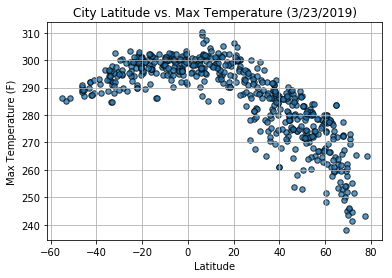

In [20]:
plt.scatter(weather_df['Lat'] , weather_df['Max Temp'] , s = 30, alpha = .75 , edgecolor = 'black')
plt.title('City Latitude vs. Max Temperature (3/23/2019)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(b=True)

#### Latitude vs. Humidity Plot

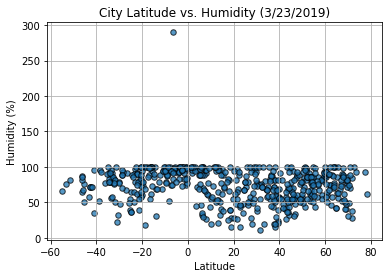

In [21]:
plt.scatter(weather_df['Lat'] , weather_df['Humidity'] , s = 30, alpha = .75 , edgecolor = 'black')
plt.title('City Latitude vs. Humidity (3/23/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(b=True)

#### Latitude vs. Cloudiness Plot

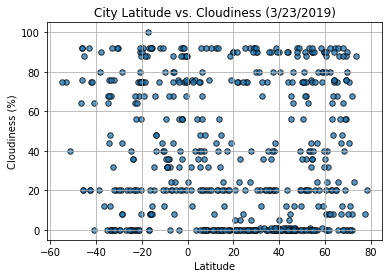

In [22]:
plt.scatter(weather_df['Lat'] , weather_df['Cloudiness'] , s = 30, alpha = .75 , edgecolor = 'black')
plt.title('City Latitude vs. Cloudiness (3/23/2019)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(b=True)

#### Latitude vs. Wind Speed Plot

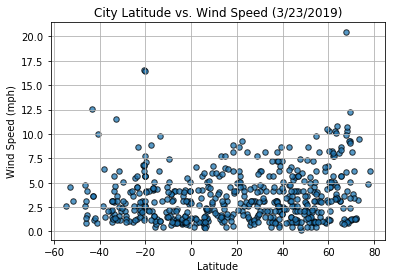

In [23]:
plt.scatter(weather_df['Lat'] , weather_df['Wind Speed'] , s = 30, alpha = .75 , edgecolor = 'black')
plt.title('City Latitude vs. Wind Speed (3/23/2019)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(b=True)